In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df1=pd.read_excel('../data/final_aqi_india-30-08-22.xlsx', index_col=0,na_values=[('NaN')]).dropna(how="any",axis=0)

In [4]:
df1.shape

(143, 6)

In [5]:
df1.dtypes

city      object
AQI      float64
PM2.5     object
PM10      object
NO2       object
NH3       object
dtype: object

Converting to numeric

In [6]:
cols = df1.columns.drop('city')

In [7]:
df1[cols] = df1[cols].apply(pd.to_numeric, errors='coerce')

In [8]:
df1.dropna(how="any",inplace=True, axis=0)

In [9]:
df1.shape

(143, 6)

Now, correlation

In [10]:
df1.corr()

,AQI,PM2.5,PM10,NO2,NH3
AQI,1.000000,0.788231,0.897450,0.184062,-0.009131
PM2.5,0.788231,1.000000,0.737613,0.074966,-0.023406
PM10,0.897450,0.737613,1.000000,0.235529,-0.180974
NO2,0.184062,0.074966,0.235529,1.000000,0.014508
NH3,-0.009131,-0.023406,-0.180974,0.014508,1.000000


plotting the same

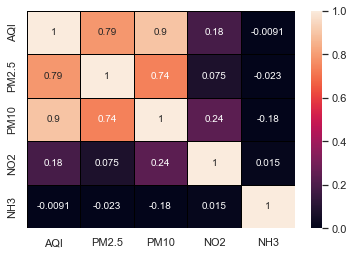

In [11]:
sns.set_theme()
data = df1.corr()
ax = sns.heatmap(data, vmin=0, vmax=1, annot=True, linewidths=1, linecolor="black")

Finding out highest affected areas

In [19]:
data_sort_type_aqi = df1.sort_values('AQI',ascending=False).city
data_sort_type_pm25 = df1.sort_values('PM2.5',ascending=False).city

In [13]:
df1.head()

,city,AQI,PM2.5,PM10,NO2,NH3
1,delhi,119.0,88,189,72,13
2,bengaluru,47.0,70,54,22,7
3,mumbai,70.0,169,132,7,5
4,chennai,74.0,89,74,40,4
5,hyderabad,74.0,49,74,54,2


AQI Top 5

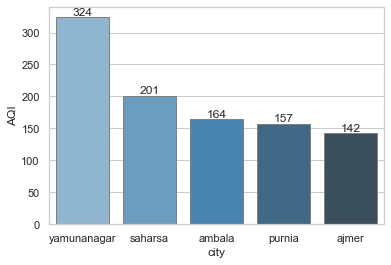

In [20]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="city", y="AQI", data=df1, order=data_sort_type_aqi.iloc[:5], palette="Blues_d", linewidth=1, edgecolor=".5")
# ax.set(xticklabels=['abc','def','ghi','jkl','mno']) #custom ticklabels
for i in ax.containers: #to print labels
    ax.bar_label(i)

PM2.5 top 5

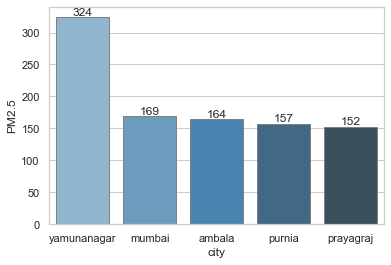

In [21]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="city", y="PM2.5", data=df1, order=data_sort_type_pm25.iloc[:5], palette="Blues_d", linewidth=1, edgecolor=".5")
# ax.set(xticklabels=['abc','def','ghi','jkl','mno']) #custom ticklabels
for i in ax.containers: #to print labels
    ax.bar_label(i)

In [16]:
#what else can I do??